In [ ]:
################################################################
###Assignment provided by Victoria University of Wellington.####
################################################################

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
%matplotlib inline

The `landmark_faces.txt` file on the course webpage has the locations in 2D of 68 landmark positions on 9780 faces. They are from https://susanqq.github.io/UTKFace/. In this assignment you are going to use PCA to transform these points, and feed the input into a classifier to predict the gender of each face. 

Start by downloading the data and loading it into a dataframe.

In [2]:
df = pd.read_csv('C:/Users/OEM/Desktop/DATA201/A5/landmark_faces.txt', sep=" ", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,1_0_2_20161219140530307.jpg,-4,71,-4,96,-3,120,-1,144,9,...,136,130,135,108,139,98,140,88,139,NaN
1,1_0_2_20161219140525218.jpg,13,76,13,96,15,117,18,137,25,...,137,121,141,102,141,94,142,85,143,NaN
2,1_0_2_20161219140540938.jpg,11,62,14,84,18,105,23,127,33,...,135,135,136,109,147,99,148,90,146,NaN
3,6_1_2_20161219140554092.jpg,36,66,34,86,38,108,45,129,54,...,140,120,154,104,168,97,167,92,166,NaN
4,1_1_2_20161219140604000.jpg,-3,60,-3,85,-1,110,3,134,12,...,137,126,141,109,153,98,154,88,153,NaN


For now, we will simply extract the locations for each landmark. They are stored as $x_1 y_1 x_2 y_2 \ldots x_{68} y_{68}$ in columns 1 to 136 of the dataframe. The following code will extract them into a data array, remove the first and last columns (the filename and the last column, which is blank), and make sure that numpy knows that the data are numbers.

In [4]:
################################################################
######################## My own Code below #####################
################################################################

data = df.to_numpy()
data = data[:,1:-1]
data = data.astype(float)

Get the size of the data array, and store the relevant information in variables `nfaces` and `npoints`

In [5]:
dfsize = data.size
print('Size of Data Array: ', dfsize)
#no. of rows
nfaces = data.shape[0]
nfaces
print('Number of Faces/Rows: ', nfaces)
npoints = 136
print('Number of points/Cols: ', npoints)
dshape = data.shape
print('Data shape: ', dshape)

Size of Data Array:  1330080
Number of Faces/Rows:  9780
Number of points/Cols:  136
Data shape:  (9780, 136)


To plot a face, take one row of the data matrix, and plot the $x$ coordinates (even-numbered indices) against $y$ coordinates (odd-numbered ones). It is helpful to use `'.-'` to plot a line as well as the points. At first this will be upside down. One way to turn it the right way up is to use 1-data on the $y$ coordinates.

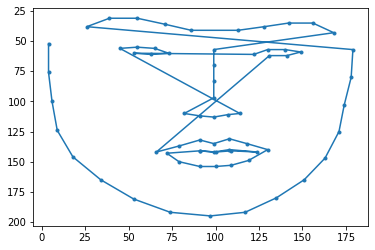

In [6]:
for i in range(nfaces):
    #get the first row, then 2nd...
    row = data[i,:]   
    #make an empty list to hold even and odds to plot
    eveni = []
    oddi = []
    for j in range(npoints):
        #if its even
        if j%2 == 0:
            eveni.append(row[j])
        #if its odd
        else:
            oddi.append(row[j])
#plot both the even(x) and odd(y) coordinates. 
pl.plot(list(eveni), list(oddi),'.-')
#Flip plot
pl.gca().invert_yaxis()

################################################################
######################## My own Code above #####################
################################################################

The points are all meant to be matched on each face (the jargon for this is that they are 'corresponding points'). This means that to find the mean face (the average face, not a nasty-looking face) you just compute the mean of each datapoint. Compute this and plot it.

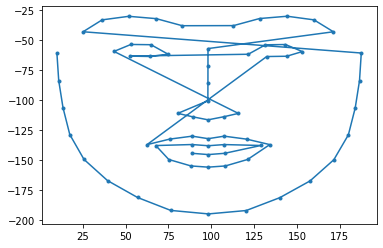

In [7]:
meanface = np.mean(data,axis=0)      
pl.plot(meanface[0::2],1-meanface[1::2],'.-');

We've made the PCA algorithm a lot. Here it is again for your use. 

In [8]:
# Here is PCA

################################################################
###Code provided by Victoria University of Wellington below.####
################################################################

# Subtract off the mean to normalize
#1..D_n = D_0-meanface
data = data - meanface

# Compute the covariance matrix
C = np.cov(data.T)

# Get the eigenvalues and eigenvectors
evals,evecs = np.linalg.eig(C)

# Now need to sort them into descending order
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]

# Transform the data - normlized data * eigenvectors
#2..ND = D_n*V
#shape is retained = 9780*136 x 136*136
# evecs.T shape is 136*136
#note same as np.dot(data,evec)
newdata = np.dot(evecs.T,data.T).T

################################################################
###Code provided by Victoria University of Wellington above.####
################################################################

Compute the scree plot of the principal components and see how many you think might be useful.

Text(0, 0.5, 'cumulative unexplained variance')

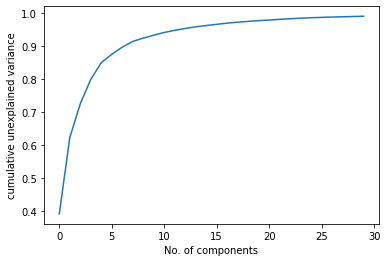

In [9]:
################################################################
######################## My own Code ###########################
################################################################

from sklearn.decomposition import PCA

pca = PCA(0.991)
#Explained variance
p = pca.fit(newdata)
#Cumulative summary of explained variance
pl.plot(np.cumsum(p.explained_variance_ratio_))
pl.xlabel('No. of components')
pl.ylabel('cumulative unexplained variance')

################################################################
######################## My own Code ###########################
################################################################

MIGHT BE USEFUL: 
Basically around 30 components would be useful when they reach around 100% unexplained variance

Reconstruct a face from the dataset using different numbers of dimensions, and plot both the original and reconstructed face. Use this to decide how many principal components you actually need. As a hint, here is the code to reconstruct the original data. You simply need to reduce the size of the eigenvector matrix appropriately in order to reconstruct lower-dimensional versions of it.

In [10]:
#ndim
data.shape

(9780, 136)

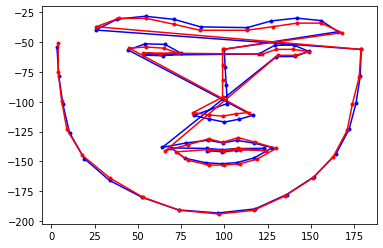

In [11]:

################################################################
###Code provided by Victoria University of Wellington.####
################################################################

#-mean means coord will be centered around 0. +mean will get it back to around 100,-100(x,y)
#same as prev
newdata = np.dot(evecs.T,data.T).T 
#==================
#3..D_ntransposed = newdata*eigenvector transposed
#9780*136 = 9780*136 * 136*136  
#meaning 9780*136 = 9780*135 * 135*136
#So we create a ndim variable
ndim = 6
#REDUCES SIZE OF EIGENVECTOR MATRIX
y=np.transpose(np.dot(evecs[:,:ndim],newdata.T[:ndim,:]))+meanface
#============
i1=50
pl.plot(y[i, 0::2],1-y[i,1::2],'b.-');
#original 
#4...D_0transposed = newdatatransposed + meanface
original = data[i,:]+meanface
pl.plot(original[0::2],1-original[1::2],'r.-');


################################################################
###Code provided by Victoria University of Wellington.####
################################################################

USEFUL PCA COMPONENTS:
In reality roughly 6 components needed

The next code computes some a set of shapes. Look at the code, and explain what it is doing in a couple of sentences below. 

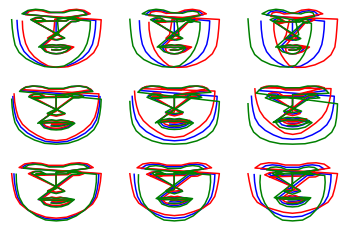

In [12]:
################################################################
###Code provided by Victoria University of Wellington.####
################################################################
for pc in range(3):
    for sd in range(1,4):
        pl.subplot(3,3,pc*3+sd);
        pl.plot(meanface[0::2],1-meanface[1::2],'b')
        pl.plot(meanface[0::2] - np.sqrt(evals[pc])*sd*evecs[0::2,pc],1 - (meanface[1::2] - np.sqrt(evals[pc])*sd*evecs[1::2,pc]),'r') 
        pl.plot(meanface[0::2] + np.sqrt(evals[pc])*sd*evecs[0::2,pc],1 - (meanface[1::2] + np.sqrt(evals[pc])*sd*evecs[1::2,pc]),'g')         
        pl.axis('off')
        
################################################################
###Code provided by Victoria University of Wellington.####
################################################################

---------What the code does----------

The code in general creates 9 seperate subplot images. For each image plotted, there is two more images plotted on top of it. Order of blue, red then green face 

The first plot for each image is the blue face, with no factors of eigenvectors and eigenvalues involved. Blue faces x coordinates is meanface ranging from index 0::2, y-coordinates for blue faces are  1-meanface with index range 1::2. 

The 2nd overlay image is the red image/face. This red face plotting for x coordinates is the meanface minusing the Square root of eigenvalues times column times eigenvectors. And the y - coordinates are the  meanface(index range 1::2) minus the squareroot of column eigenvalues times eigenvectors. 

The last overlay image is the green image/face which pretty much is the red image but reversed for the calculations done.

sd* would refer to scaling the coordinates by standard deviation

pl.axis('off') basically turns off axis lines and labels.

To get training labels, look at the names of the images (which are in df[:,0]). The names are age_gender_race_date.jpg. We are interested in the gender, which is 0 or 1 for male and female (I'm not sure which is which, and it doesn't matter). Extract that digit (`stringname.find()` might be helpful, where stringname is a variable) and store it as the target variable. There is one error in the data, which is index 8513. I think you should assign it to category 0. 

In [13]:
################################################################
######################## My own Code below #####################
################################################################

#There is one error in the data, which is index 8513. I think you should assign it to category 0.
df.iloc[8513,0]='1_0_2_20161219465730307'

traininglabels = []
for i in df[0].values:
    x = i.split("_")
    #training label
    traininglabels.append(x[1])
         
print("Training Labels :", traininglabels)

#store it as the target variable.
target = traininglabels

Training Labels : ['0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '

Now use an algorithm from sklearn to classify the faces based on (i) the original data, and (ii) some small number of principal components. You should compare both the accuracy and time to train. Don't forget ot split the data into training and testing. You might find that very small numbers of principal components are good for this. 

In [14]:
#a classification algorithm to use is Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import metrics

#drop nans
dfnonan = df.drop([137], axis =1)

x = target
y = dfnonan.drop([0], axis=1)

X_train, X_test, y_train, y_test = train_test_split(y,x, test_size=0.2, random_state = 42)
print(len(X_train), ' Training Set +', len(X_test), ' Testing Set')

7824  Training Set + 1956  Testing Set


In [15]:
#classify the faces on the original data - fixed
clf = LogisticRegression(solver='lbfgs', max_iter = 7600)
clf.fit(X_train,y_train)
clf.fit(X_test,y_test)

#on the testing data
y_testpred = clf.predict(X_test)
#on the training data
y_trainpred = clf.predict(X_train)

#Accuracy
accuracy1 = (metrics.accuracy_score(y_test,y_testpred))
accuracy2 = (metrics.accuracy_score(y_train,y_trainpred))
print('accuracy test score: ', accuracy1)
print('accuracy train score: ',accuracy2)

#Classification Report on test
print(classification_report(y_test,y_testpred))
#Classification Report on train
print(classification_report(y_train,y_trainpred))

accuracy test score:  0.8098159509202454
accuracy train score:  0.7691717791411042
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       871
           1       0.82      0.84      0.83      1085

    accuracy                           0.81      1956
   macro avg       0.81      0.81      0.81      1956
weighted avg       0.81      0.81      0.81      1956

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      3502
           1       0.79      0.80      0.79      4322

    accuracy                           0.77      7824
   macro avg       0.77      0.77      0.77      7824
weighted avg       0.77      0.77      0.77      7824



In [16]:
#Classify faces on original data and small number of principal componenents.(reduced)

#instantiate PCA
# Make an instance of the Model
pca = PCA(n_components = 6)
pca.fit(X_train)
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

lrpca = LogisticRegression(solver='lbfgs', max_iter = 7600)
lrpca.fit(train_img, y_train)

#on the training data
y_trainpred = lrpca.predict(train_img)
#on the testing data
y_testpred = lrpca.predict(test_img)


#Accuracy
accuracy1 = (metrics.accuracy_score(y_test,y_testpred))
accuracy2 = (metrics.accuracy_score(y_train,y_trainpred))
print('accuracy test score: ', accuracy1)
print('accuracy train score: ', accuracy2)
#Classification Report on test
print(classification_report(y_test,y_testpred))
#Classification Report on train
print(classification_report(y_train,y_trainpred))

################################################################
######################## My own Code Above #####################
################################################################

accuracy test score:  0.6692229038854806
accuracy train score:  0.6540132924335378
              precision    recall  f1-score   support

           0       0.66      0.52      0.58       871
           1       0.67      0.79      0.73      1085

    accuracy                           0.67      1956
   macro avg       0.67      0.65      0.65      1956
weighted avg       0.67      0.67      0.66      1956

              precision    recall  f1-score   support

           0       0.64      0.51      0.57      3502
           1       0.66      0.77      0.71      4322

    accuracy                           0.65      7824
   macro avg       0.65      0.64      0.64      7824
weighted avg       0.65      0.65      0.65      7824



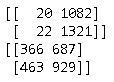

RESULT: 

It seems that the reduced pca(6 components) tends to reduce the accuracy score in general. Although its the reverse when not using pca(Score is higher without pca, this could probably beacuse there is more data to deal with accurately.) 